<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-:--Write-the-code" data-toc-modified-id="Question-:--Write-the-code-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question :  Write the code</a></span><ul class="toc-item"><li><span><a href="#Initialize-the-value" data-toc-modified-id="Initialize-the-value-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initialize the value</a></span></li><li><span><a href="#Convert-histogram-to-probability-density-function" data-toc-modified-id="Convert-histogram-to-probability-density-function-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Convert histogram to probability density function</a></span></li><li><span><a href="#Moment-Calcuation" data-toc-modified-id="Moment-Calcuation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Moment Calcuation</a></span></li></ul></li><li><span><a href="#Inbuild-function:" data-toc-modified-id="Inbuild-function:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inbuild function:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#scipy.stats.moment-do-not-compute-weighted-mean/variance/skewness/Kurtosis" data-toc-modified-id="scipy.stats.moment-do-not-compute-weighted-mean/variance/skewness/Kurtosis-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>scipy.stats.moment do not compute weighted mean/variance/skewness/Kurtosis</a></span></li></ul></li></ul></li></ul></div>

In [1]:
# For the formatting of the jupyter-notebook
import os
from IPython.core.display import HTML
def load_style(directory = '../', name='customMac.css'):
        styles = open(os.path.join(directory, name), 'r').read()
        return HTML(styles)
load_style()

## Question :  Write the code
1. Compute the histogram of the given image
<img src="../imgs/HistImg.png" alt="Drawing" style="width: 250px;"/>
2. Compute the probability density function from the histogram.
3. Compute statistical moments mean, variance, skewness, and kurtosis.
4. Compute Uniformity, Average Entropy.

### Initialize the value

In [7]:
img = [[1,0,2,4,5,3,1],
       [9,1,1,4,7,2,1],
       [10,3,7,3,5,3,3],
       [11,2,3,3,3,2,1],
       [7,5,6,6,7,6,1],
       [1,4,1,1,4,9,1],
       [2,8,1,1,5,1,1]]
type(img)

list

In [8]:
def myHist(img, bins):
    histVal = np.zeros(bins,dtype=int)
    grayLabel = range(bins)
    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            for k in range(bins):
                if img[i,j] == grayLabel[k]:
                    histVal[k] = histVal[k]+1
    return histVal

In [9]:
import numpy as np
from matplotlib import pyplot as plt

img = np.asarray(img,dtype=int)

type(img)


numpy.ndarray

[ 1 15  5  8  4  4  3  4  1  2  1  1  0  0  0  0]


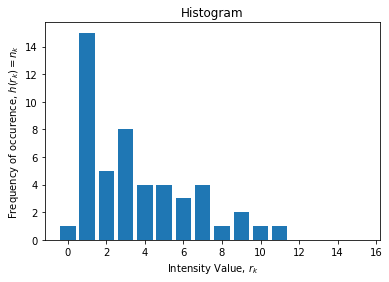

In [10]:
# ## Inbuild function
# hist,bins = np.histogram(img.ravel(),16,[0,16])
# print(hist,bins)

## User Defined function
hist = myHist(img,16)
print(hist)
plt.bar(range(16),hist)
plt.xlabel('Intensity Value, $r_k$')
plt.ylabel('Frequency of occurence, $h(r_k)=n_k$')
plt.title('Histogram')
plt.show()

### Convert histogram to probability density function

[0.02040816 0.30612245 0.10204082 0.16326531 0.08163265 0.08163265
 0.06122449 0.08163265 0.02040816 0.04081633 0.02040816 0.02040816
 0.         0.         0.         0.        ]


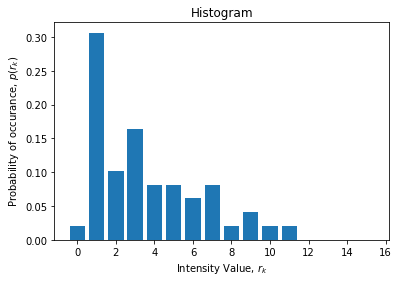

In [12]:
prob = hist/np.sum(hist)
print(prob)
plt.bar(range(16),prob)
plt.xlabel('Intensity Value, $r_k$')
plt.ylabel('Probability of occurance, $p(r_k)$')
plt.title('Histogram')
plt.show()

### Moment Calcuation

In [13]:
def mean(x,counts):
    return np.sum(x*counts) / np.sum(counts)

statMean = mean(range(16),hist)
statMean

3.63265306122449

In [16]:
def nmoment(x, counts, c, n):
    return np.sum(counts*(x-c)**n) / np.sum(counts)

variance = nmoment(range(16),hist,statMean,2)
print('Variance=',variance)

skewness = nmoment(range(16),hist,statMean,3)
print('Skewness=',skewness)

kurtosis = nmoment(range(16),hist,statMean,4)
print('Kurtosis=',kurtosis)

Variance= 7.6609745939191995
Skewness= 18.533094203945634
Kurtosis= 166.68475633417353


In [17]:
Uniformity = np.sum(prob**2)
print(Uniformity)

0.1578508954602249


In [46]:
val = -np.log2(np.asarray(prob))
val[val==np.inf]=0
AverageEntropy = np.sum(prob*val)
print(AverageEntropy)

3.0643448051207582


/Users/kundan/opt/anaconda3/envs/myPytorch/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


## Inbuild function: 
#### scipy.stats.moment do not compute weighted mean/variance/skewness/Kurtosis

In [47]:
from scipy import stats
val = stats.moment(hist, moment = 3,axis=0)
val

105.00439453125